<a href="https://colab.research.google.com/github/veritaem/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Copy_of_Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn

In [0]:
data = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(data)

In [0]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [0]:
df['Alley'].fillna('string', inplace = True)
df['MasVnrType'].fillna('string', inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)
df['BsmtQual'].fillna('string', inplace = True)
df['BsmtCond'].fillna('string', inplace = True)
df['BsmtExposure'].fillna('string', inplace = True)
df['BsmtFinType1'].fillna('string', inplace = True)
df['BsmtFinType2'].fillna('string', inplace = True)
df['Electrical'].fillna('string', inplace = True)
df['GarageType'].fillna('string', inplace = True)
df['GarageYrBlt'].fillna(0, inplace = True)
df['GarageFinish'].fillna('string', inplace = True)
df['GarageQual'].fillna('string', inplace = True)
df['GarageCond'].fillna('string', inplace = True)

In [0]:
df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1)

In [7]:
dummyEncode(df)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [8]:

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [0]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [0]:
Y = df['SalePrice']
df['ln_Y'] = np.log(df['SalePrice'])

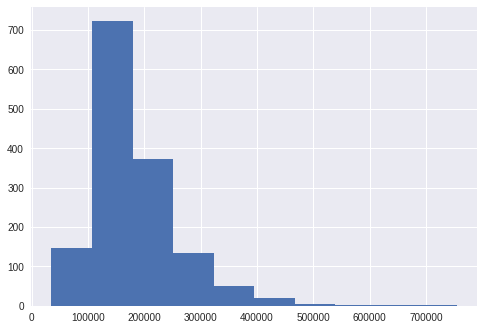

In [11]:
Y.hist()

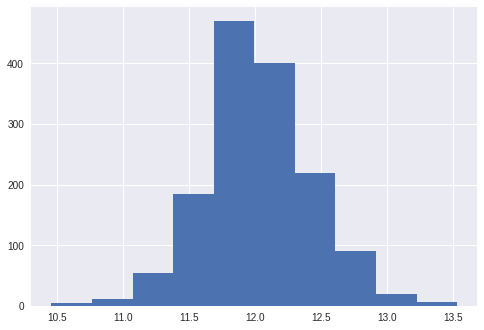

In [12]:
df.ln_Y.hist()

In [0]:
#sns.pairplot(data = df, y_vars = 'SalePrice', x_vars = features)

In [0]:
#sns.pairplot(data = df, y_vars = 'ln_Y', x_vars = features)

In [15]:
df = df + 1
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_Y
0,2,61,4,66.0,8451,2,3,4,4,1,5,1,6,3,3,1,6,8,6,2004,2004,2,2,13,14,2,197.0,3,5,3,3,4,4,3,707,6,1,151,857,2,1,2,5,857,855,1,1711,2,1,3,2,4,2,3,9,7,1,2,2004.0,2,3,549,5,5,3,1,62,1,1,1,1,1,3,2009,9,5,208501,13.247694
1,3,21,4,81.0,9601,2,3,4,4,1,3,1,25,2,3,1,3,7,9,1977,1977,2,2,9,9,3,1.0,4,5,2,3,4,2,1,979,6,1,285,1263,2,1,2,5,1263,1,1,1263,1,2,3,1,4,2,4,7,7,2,2,1977.0,2,3,461,5,5,3,299,1,1,1,1,1,1,6,2008,9,5,181501,13.109011
2,4,61,4,69.0,11251,2,3,1,4,1,5,1,6,3,3,1,6,8,6,2002,2003,2,2,13,14,2,163.0,3,5,3,3,4,3,3,487,6,1,435,921,2,1,2,5,921,867,1,1787,2,1,3,2,4,2,3,7,7,2,2,2002.0,2,3,609,5,5,3,1,43,1,1,1,1,1,10,2009,9,5,223501,13.317167
3,5,71,4,61.0,9551,2,3,1,4,1,1,1,7,3,3,1,6,8,6,1916,1971,2,2,14,16,3,1.0,4,5,1,4,2,4,1,217,6,1,541,757,2,3,2,5,962,757,1,1718,2,1,2,1,4,2,3,8,7,2,6,1999.0,3,4,643,5,5,3,1,36,273,1,1,1,1,3,2007,9,1,140001,12.849398
4,6,61,4,85.0,14261,2,3,1,4,1,3,1,16,3,3,1,6,9,6,2001,2001,2,2,13,14,2,351.0,3,5,3,3,4,1,3,656,6,1,491,1146,2,1,2,5,1146,1054,1,2199,2,1,3,2,5,2,3,10,7,2,2,2001.0,2,4,837,5,5,3,193,85,1,1,1,1,1,13,2009,9,5,250001,13.429216


In [0]:
df['Neighborhood_cubed'] = df['Neighborhood']**3
df['OverallQual_sq'] = df['OverallQual']**2
df['OverallCond_sq'] = df['OverallCond']**2
df['YearBuilt_sq'] = df['YearBuilt']**2
df['MasVnrArea_cubed'] = df['MasVnrArea']**3
df['GrLivArea'] = df['GrLivArea']**2
df['TotRmsAbvGrd_sq'] = df['TotRmsAbvGrd']**2
df['BsmtQual_sq'] = df['BsmtQual']**2
df['BsmtUnfSF_sq'] = df['BsmtUnfSF']**2
df['LotFrontage_cubed'] = df['LotFrontage']**3
df['Neighborhood_Zones'] = df['MSZoning'] / df['Neighborhood']
df['Neighborhood_top'] = df['LandContour'] + df['LandSlope'] / df['Neighborhood']
df['Cond_Over_Time'] = df['YearRemodAdd'] - df['YearBuilt'] / df['OverallCond']
df['Nearby'] = df['Condition1'] + df['Condition2']
df['HouseQuality'] = df['OverallCond'] + df['OverallQual']
df['Exterior'] = df['ExterCond'] + df['ExterQual']
df['Bathrooms'] = df['BsmtFullBath'] + df['BsmtFullBath'] + df['FullBath'] + df['HalfBath']
df['housesize'] = df['GrLivArea'] + df['GarageArea'] / df['HouseStyle'] + df['TotRmsAbvGrd'] 
#df['depends'] = df['LotFrontage'] + df['Alley'] + (df['LotFrontage'] * df['Alley']) 
#only interaction term i could think of that might be a good selling point('do you want to be connected to an alley? depends on what neighborhood')
#but it has terribel accuracy so im leavin it out if i think of a better one ill make it


In [17]:
df2 = df.drop(columns = ['SalePrice', 'ln_Y'])
df2.fillna(0, inplace = True)
df2 = df2 + 1
df2.isnull().sum().sum()

0

In [0]:
y = df.loc[:, ['ln_Y']].values
featured = df2.loc[::].values

X_train, X_test, Y_train, Y_test = train_test_split(featured, y, test_size=.5, random_state=7337) 

In [19]:
X_train

array([[3.35000000e+02, 2.20000000e+01, 5.00000000e+00, ...,
        9.00000000e+00, 9.00000000e+00, 2.65720267e+06],
       [2.56000000e+02, 8.20000000e+01, 5.00000000e+00, ...,
        1.00000000e+01, 7.00000000e+00, 1.69785675e+06],
       [8.70000000e+01, 8.20000000e+01, 5.00000000e+00, ...,
        1.00000000e+01, 8.00000000e+00, 2.17568412e+06],
       ...,
       [5.22000000e+02, 7.20000000e+01, 5.00000000e+00, ...,
        9.00000000e+00, 7.00000000e+00, 4.33061917e+06],
       [4.91000000e+02, 1.92000000e+02, 5.00000000e+00, ...,
        7.00000000e+00, 7.00000000e+00, 5.83275800e+06],
       [1.01500000e+03, 7.20000000e+01, 5.00000000e+00, ...,
        8.00000000e+00, 7.00000000e+00, 2.25904817e+06]])

In [20]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.1818400594230615
R^2 is 0.7999347064408716
coefficients:  [-1.47248609e-05 -5.10018115e-04 -1.11661612e-02  1.72831923e-03
  1.21487095e-06  1.03288760e-01 -1.29220436e-02 -7.75941133e-03
 -2.80042976e-01 -1.87467856e-01 -3.44594423e-03 -6.85600296e-03
 -7.86824757e-03  3.86529766e-03 -4.91453352e-03  1.31902426e-02
  1.26318575e-02  2.33999441e-01 -4.00680444e-01 -4.38597711e-02
 -4.50184467e-03  8.84481206e-03 -1.23038232e-02 -3.72897837e-03
  1.93242700e-03  1.79797608e-02 -1.37487838e-05 -2.46804133e-03
  3.78307377e-03  5.98879418e-03 -7.95608110e-02  1.26443163e-02
  2.95392992e-04 -1.74979222e-03  7.30165938e-05  1.98905353e-03
  4.46546769e-05  7.77712232e-06  1.25448958e-04  7.91699034e-04
 -1.06885071e-02  9.22157979e-02 -2.10832846e-03  3.75299729e-04
  3.50011571e-04  2.82835763e-04 -1.47633751e-04  9.22822604e-03
  3.72949000e-02 -3.93471893e-03 -4.81764031e-03 -1.20724293e-02
 -1.08347883e-01 -1.73985239e-02 -8.03283665e-03  2.36708317e-02
  2.39542009e-02 -1.12

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data